In [541]:
import numpy as np
import pandas as pd

In [702]:
class MyPerceptron:
    def __init__(self, epochs=5, random_range=0.1, learning_rate=0.1, heavyside_threshold=0.0, dev=0):
        self.epochs = epochs
        self.n_features = 5
        self.heavyside_threshold = heavyside_threshold
        self.random_range = random_range
        self.learning_rate = learning_rate
        self.dev = dev
        
    def init_weights(self):
        # on initialise les poids à de petits nombre aléatoire
        self.w0 = np.random.uniform(-self.random_range, self.random_range, size=self.n_features+1)
        self.w = np.copy(self.w0)
        return self.w0
    
    def fit(self, X_train, Y_train):
        """ Entrainement
        X_train: une liste de vecteurs
        Y_train: une liste de valeurs -1/1
        """
        self.n_features = X_train[0].size
        self.n_train_samples = len(X_train)
        self.init_weights()
        self.errors = [] 
        self.ws = [self.w0]
        
        # on boucle sur les époques
        for epoch in range(self.epochs):
            if self.dev:
                print("époque: {}/{}, poids : {}".format(epoch, self.epochs, self.w))
            # on boucle sur les entrées
            for j, Xj in enumerate(X_train):
                # on calcul les nouveaux poid à chaque itération
                tj = Y_train[j]
                yj = self.predict_single(Xj)
                # on calcule l'erreur entre la sortie calculée et la sortie réel  "vrais"
                errorj = tj - yj
                # on calcule la variation de poids
                deltaj = self.learning_rate * errorj * Xj 
                # on met à jour les poids
                self.w[1:] += deltaj
                self.w[0] += self.learning_rate * errorj
                self.ws.append(np.copy(self.w))
                self.errors.append(errorj)
        print("fit done !")
            
    def predict_single(self, single_X):
        """ On calcule la sortie pour une entrée
        """
        z = self.w[0]
        for idx, x in enumerate(single_X):
            z += self.w[idx+1] * x
        
        return self.activation_function(z)
        
    def predict(self, X):
        """ On calcule la sortie en fonction de l'entrée
        X: liste de vecteurs d'entrée
        Sortie: liste de sortie calculées: -1/1
        """
        Y = []
        for x in X:
            Y.append(self.predict_single(x))
        return np.array(Y, dtype=int)
        
    def activation_function(self, z):
        """ Fonction d'activation
        z float: somme des poids x entrées
        """
        if z > self.heavyside_threshold:
            return 1.0
        else:
            return 0.0

In [569]:
perceptron = MyPerceptron()
print(perceptron.init_weights())
print(perceptron.predict([[1, 2, -2, -1, -1]]))

[-0.01751564 -0.09201566 -0.04571241  0.00302269  0.04488614  0.03052824]
[1.0]


In [544]:
# on teste l'algorithme avec les Iris
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


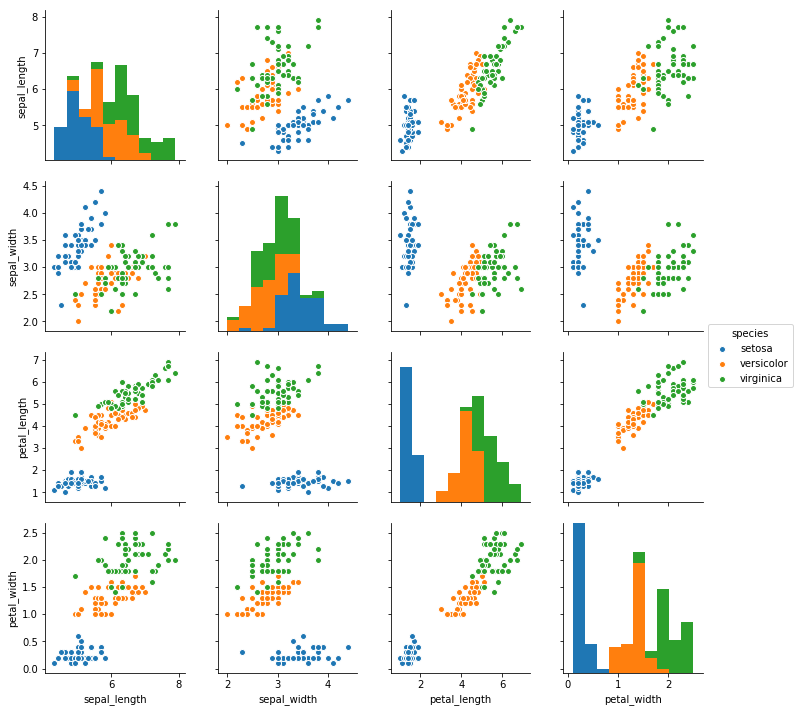

In [546]:
import seaborn as sn
sn.pairplot(data=iris, hue="species", diag_kind="hist")

In [550]:
iris = iris[["sepal_width", "petal_length", "species"]]
iris.loc[iris["species"] != "viginica"]
iris.head()

,sepal_width,petal_length,species
0,3.5,1.4,setosa
1,3.0,1.4,setosa
2,3.2,1.3,setosa
3,3.1,1.5,setosa
4,3.6,1.4,setosa


In [703]:
from sklearn.model_selection import train_test_split

X = iris[["sepal_width", "petal_length"]].values
Y = iris["species"].values
Y_as_float = np.empty(shape=Y.shape, dtype=float)
for i,value in enumerate(Y):
    if Y[i] == "setosa":
        Y_as_float[i] = 0.0
    else:
        Y_as_float[i] = 1.0

Y = np.array(Y_as_float, dtype=int)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_as_float, 
    shuffle=True, test_size=0.4, train_size=None)

# print(X_train, X_test, Y_train, Y_test)

fit done !
correct ones 60
false ones 0
ratio: 1.0


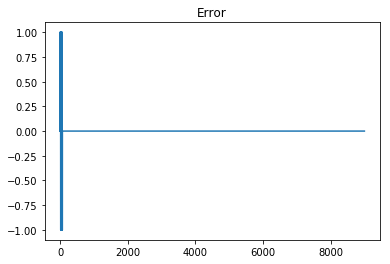

In [704]:
import matplotlib.pyplot as plt

perceptron = MyPerceptron(epochs=100, random_range=0.01, learning_rate=0.0001, heavyside_threshold=0.0, dev=0)
perceptron.fit(X_train, Y_train)

predicted = perceptron.predict(X_test)
    
# on affiche les résultats
print("correct ones", np.sum(predicted == Y_test))
print("false ones", np.sum(predicted != Y_test))
print("ratio:", np.mean(predicted == Y_test))
plt.plot(perceptron.errors)
plt.title("Error")
plt.show()

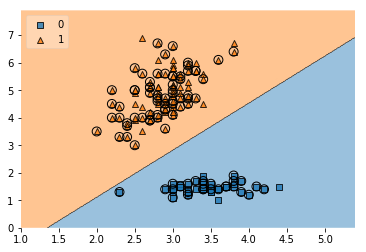

In [705]:
from mlxtend.plotting import plot_decision_regions

fig = plot_decision_regions(X=X, y=Y, clf=perceptron, legend=2, X_highlight=X_train)
plt.show()

In [707]:
from mlxtend.classifier import Adaline

adaline = Adaline(epochs=30, eta=0.01)
adaline.fit(X_train, np.array(Y_train, dtype=int))

/usr/local/lib/python3.5/dist-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):


correct ones 60
false ones 0
ratio: 1.0


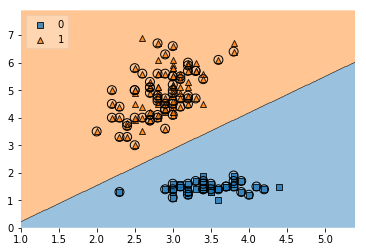

In [709]:
predicted = adaline.predict(X_test)
    
# on affiche les résultats
print("correct ones", np.sum(predicted == Y_test))
print("false ones", np.sum(predicted != Y_test))
print("ratio:", np.mean(predicted == Y_test))

fig = plot_decision_regions(X=X, y=Y, clf=adaline, legend=2, X_highlight=X_train)
plt.show()

done
score 1.0


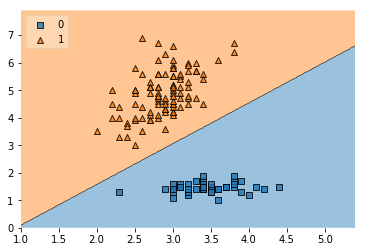

In [717]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mlp = MLPClassifier(
    hidden_layer_sizes=(1, ),
    activation="logistic",
    solver="lbfgs",
    verbose=True,
)

scaler = StandardScaler()

p = Pipeline([
    ("Scaler", scaler),
    ("MLP", mlp),
])
p.fit(X_train, Y_train)
print("done")

score = p.score(X_test, Y_test)
print("score", score)

plt.figure()
plot_decision_regions(X, Y, clf=p, legend=2)
plt.show()